In [4]:
setwd('/Users/luli/Desktop/wisc/628/module2')
data<-read.csv("data_cleaned.csv",header=TRUE)
data<-data[,c(2,4:17)]

Load the data 

# Use Mallows' Cp to do the variable selection

Since the Full model is having unsignificant variables. And our aim is to find a model with good performance but 
also convenient to compute with. So We need to use some methods to do the variable selection. 

In this part, we implement a statistic Mallows' Cp to do the variable selection.

The definition for the Mallow's Cp is : $$\mathrm{C}_{p}=\frac{\operatorname{RSS}(p)}{\sigma^{2}}-N+2 p$$



The $\sigma^{2}$  can be derived from the MSE(Mean Squared Error) from the full model. And the ${RSS}(p)$ is the sum of squared errors for the model with p predictors.

So we would like to find the model which the expected value of Mallow's Cp is close to p+1. That is the $\frac{\operatorname{RSS}(p)}{\sigma^{2}} $is close to   N-(P+1) and the  ${RSS}(p)$ is close to the sum of squared errors of the full model, which means the reduced model performs as good as the full model but with less predictors.

## Split the model into train set and test set

We randomly split the data set into train set and test set with proportion 8:2.

In [5]:
set.seed(1234)
train_row <- sample(nrow(data), 0.8*nrow(data), replace = FALSE)
train_set <- data[train_row,]
test_set <- data[-train_row,]
dim(train_set)
dim(test_set)

[1] 196  15

[1] 50 15

Using the regsubsets function in leaps package, we aim to find out the best models under different number of predictors with exhaustive search.

In [7]:
library("leaps")
m1<-regsubsets(train_set$BODYFAT~.,data=train_set,nbest=1,method = "exhaustive",nvmax=14)
sm1<-summary(m1)
cbind(sm1$which, round(cbind(rsq=sm1$rsq,rss=sm1$rss,adjr2=sm1$adjr2,cp=sm1$cp,bic=sm1$bic), 3))


(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjr2,cp,bic
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.661,3493.553,0.660,45.964,-201.714
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.711,2983.086,0.708,13.193,-227.396
1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.727,2811.850,0.723,3.529,-233.704
1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.731,2773.999,0.726,2.951,-231.083
1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.734,2748.447,0.727,3.211,-227.618
1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0.736,2725.415,0.727,3.642,-223.990
1,1,1,0,1,1,0,1,0,1,0,0,0,0,1,0.738,2705.688,0.728,4.298,-220.135
1,1,1,0,1,1,0,1,0,1,0,0,0,1,1,0.740,2685.233,0.729,4.905,-216.345
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0.741,2676.483,0.728,6.309,-211.706
1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,0.741,2668.904,0.727,7.793,-206.984


From the before table, we could see the perfromance of best models under different number of variables. To have a better look at our interested parameter Mallows' Cp, we draw plot of Mallows' Cp values versus the number of variables.

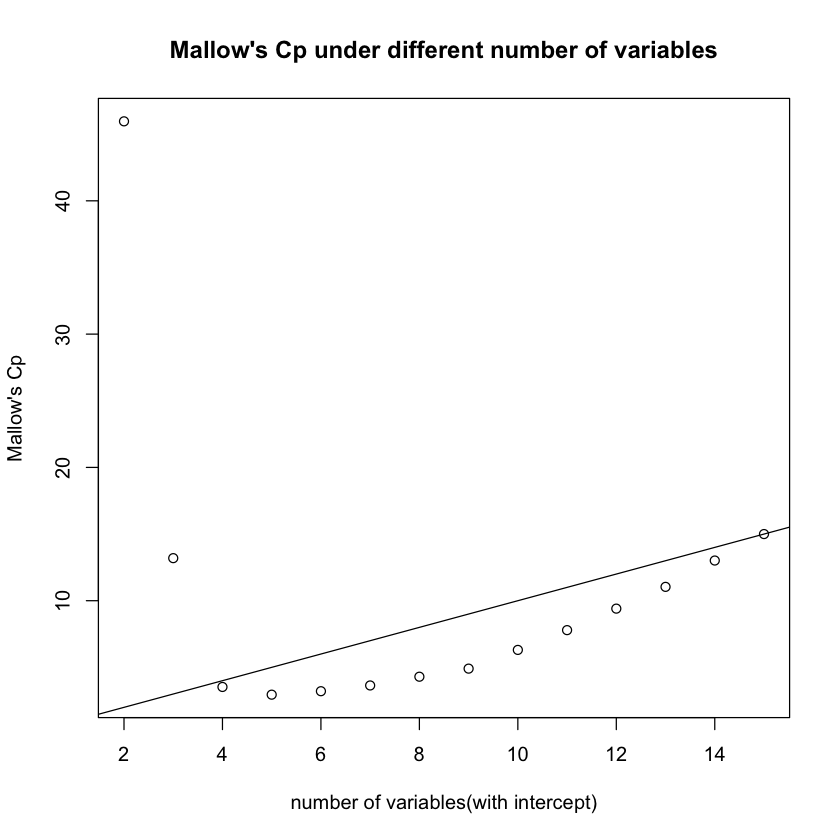

In [9]:
plot(2:15,sm1$cp,xlab="number of variables(with intercept)",ylab = "Mallow's Cp",main = "Mallow's Cp under different number of variables")
abline(a=0,b=1)

In [10]:
sm1$which[3,]

(Intercept)         AGE      WEIGHT      HEIGHT   ADIPOSITY        NECK 
       TRUE       FALSE       FALSE        TRUE       FALSE       FALSE 
      CHEST     ABDOMEN         HIP       THIGH        KNEE       ANKLE 
      FALSE        TRUE       FALSE       FALSE       FALSE       FALSE 
     BICEPS     FOREARM       WRIST 
      FALSE       FALSE        TRUE

From the plot before, we could see that when the number of variables equal to 4, Mallow's Cp is close to the p+1.  
we could also notice with 5 number of variables, the model's mallow's cp value is also close to p(the number of predictors). But the R square and the adjusted R square are just slightly bigger than the model with 4 variables.  And the BIC of this model is larger than the model with 4 predictors.  

Considering the benefits of less variable, and the value of BIC and Mallow's Cp, we decide to choose the models with 4 predictors which are intercept, Height, Abdomen and Wrist as our optimal model.

# Fit model with selected variables

## Fit the model on the train set


Call:
lm(formula = BODYFAT ~ HEIGHT + ABDOMEN + WRIST, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1650 -2.9147 -0.1392  2.7494  8.0487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.21383    7.91794   1.290 0.198616    
HEIGHT      -0.41920    0.11654  -3.597 0.000409 ***
ABDOMEN      0.73351    0.03531  20.771  < 2e-16 ***
WRIST       -1.61722    0.40970  -3.947 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.827 on 192 degrees of freedom
Multiple R-squared:  0.7275,	Adjusted R-squared:  0.7232 
F-statistic: 170.9 on 3 and 192 DF,  p-value: < 2.2e-16


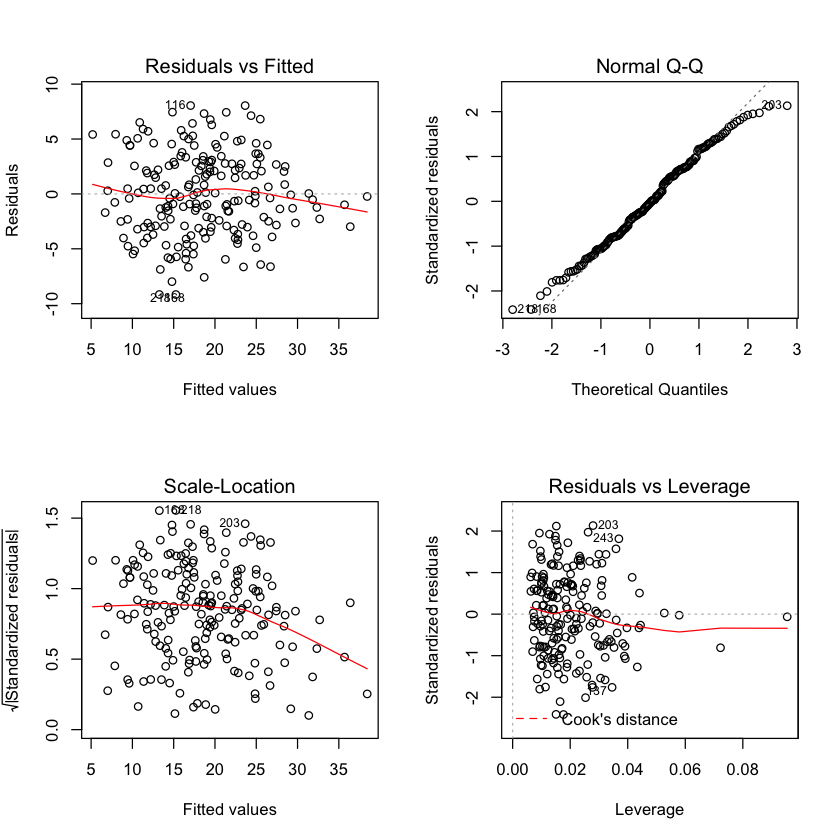

In [12]:
lm1<-lm(BODYFAT~HEIGHT+ABDOMEN+WRIST,data=train_set)
summary(lm1)
par(mfrow=c(2,2))
plot(lm1)

The Multiple R-squared is 0.7275  which means about 72% variance could be explained by the predictors and the Adjusted R-squared is 0.7232. Since the p-value for the whole model is extremly less than $\alpha=0.05$, so we may reject the null hypothesis and conclude that the model is significant. And the p-values for the individual coefficients are all smaller than $\alpha=0.05$, so we may reject the corresponding hypothesis and conclude that all the coefficients are significantly not equal to zero.

From the first and third plot, we may belive that the constant variance assumption is true and the fitted values are independent from residuals. With the second plot, the residuals are roughly normaly distributed with a thinner tail than the normal distribution. From the last plot, there is no significant leverage point.

# Test the model on the test set

In [15]:
pred_y_test<-predict(lm1,newdata=test_set[,c(4,8,15)])
mse_test<-mean((pred_y_test-test_set$BODYFAT)^2)
sse_test<-sum((pred_y_test- test_set$BODYFAT)^2)
sst_test<-sum((test_set$BODYFAT-mean(test_set$BODYFAT))^2)
test_r2<-(sst_test-sse_test)/sst_test
test_adj_r2=1-((1-test_r2)*(dim(test_set)[1]-1))/(dim(test_set)[1]-3-1)
test_performance=data.frame(R_Square=test_r2, adjusted_R_Square= test_adj_r2, MSE=mse_test)
cat("models' performances on the test set: \n")
print(test_performance)

models' performances on the test set:
   R_Square adjusted_R_Square      MSE
1 0.6668194         0.6450902 20.51201


# Fit on the whole data set

In [17]:
lm2<-lm(BODYFAT~HEIGHT+ABDOMEN+WRIST,data=data[,c(1,4,8,15)])
summary(lm2)
pred_y<-predict(lm2,newdata=data[,c(4,8,15)])
mse_whole<-mean((pred_y-data$BODYFAT)^2)
coefficients(summary(lm2))
cat("Adjusted R-squared:",summary(lm2)$adj.r.squared,"  R-squared:",summary(lm2)$r.squared,
    "  MSE:",mse_whole)



Call:
lm(formula = BODYFAT ~ HEIGHT + ABDOMEN + WRIST, data = data[, 
    c(1, 4, 8, 15)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0933 -2.8518 -0.3153  2.9023  9.1363 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.03624    7.37627   0.954 0.341085    
HEIGHT      -0.36209    0.10685  -3.389 0.000819 ***
ABDOMEN      0.71232    0.03195  22.292  < 2e-16 ***
WRIST       -1.56215    0.37173  -4.202 3.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.974 on 242 degrees of freedom
Multiple R-squared:  0.7153,	Adjusted R-squared:  0.7117 
F-statistic: 202.6 on 3 and 242 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.0362442,7.37626962,0.9539028,3.410847e-01
HEIGHT,-0.3620917,0.10684927,-3.3888082,8.193884e-04
ABDOMEN,0.7123171,0.03195337,22.2923975,1.361570e-60
WRIST,-1.5621476,0.37172879,-4.2023852,3.717523e-05


Adjusted R-squared: 0.7117225   R-squared: 0.7152524   MSE: 15.53831